# Modelo de Autoregresión
En esta etapa, se ajusta un modelo autoregresivo (AR) en la serie temporal del dataset [Beijing Multi-Site Air-Quality Data Set][kaggle] de Kaggle. El objetivo es capturar las dependencias temporales de la variable **PM2.5** y evaluar su capacidad predictiva a través de un modelo de regresión lineal basado en sus propios valores pasados.

[kaggle]: https://www.kaggle.com/datasets/sid321axn/beijing-multisite-airquality-data-set

### **Objetivos**

1. **Determinación del Orden del Modelo**  
   Utilización de las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF) para identificar el orden adecuado (valor de `p`) para el modelo autoregresivo.

2. **Ajuste del Modelo AR**  
   Implementación del modelo AR utilizando el valor de `p` determinado en el análisis PACF. Ajuste y obtención de los coeficientes del modelo, junto con un resumen estadístico.

3. **Evaluación del Modelo**  
   Análisis de los residuos del modelo mediante la función de autocorrelación de los residuos para validar la adecuación del modelo ajustado.

4. **Interpretación de Resultados**  
   Evaluación de los coeficientes del modelo y métricas de ajuste para comprender el comportamiento de la serie temporal y la capacidad del modelo para capturar su estructura.

Este modelo autoregresivo sirve como base para pronósticos futuros y permite entender la dependencia temporal en la serie de **PM2.5**. Los resultados obtenidos proporcionan una visión inicial de la calidad de ajuste y permiten explorar ajustes adicionales si fuera necesario.



In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

### Importación de Librerías

In [59]:
df = pd.read_csv("../data/dataset_clean.csv")

### Crear la columna 'datetime' combinando las columnas 'year', 'month', 'day', y 'hour'

In [60]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [61]:
# Verificar que 'datetime' es el índice
df.set_index('datetime', inplace=True)

### Determinar el Orden del Modelo Autoregresivo

<Figure size 1000x500 with 0 Axes>

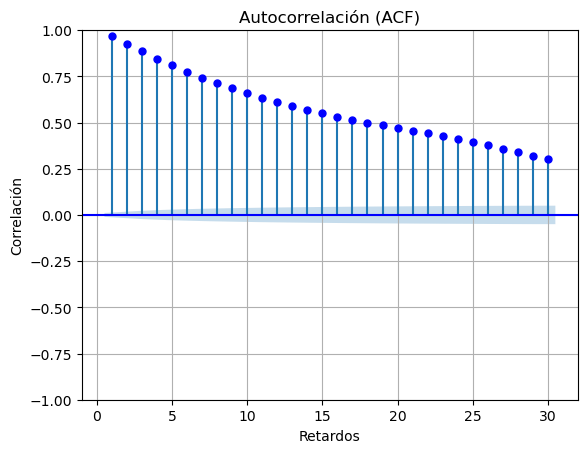

<Figure size 1000x500 with 0 Axes>

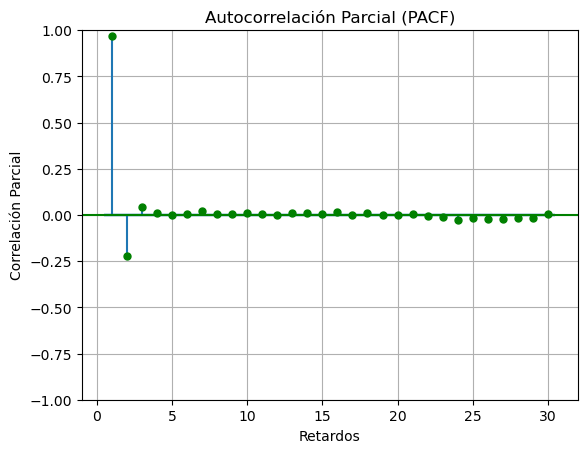

In [63]:
# Graficar ACF
plt.figure(figsize=(10, 5))
plot_acf(df['PM2.5'].dropna(), lags=30, title="Autocorrelación (ACF)", color='blue', zero=False)
plt.xlabel('Retardos')
plt.ylabel('Correlación')
plt.grid(True)
plt.show()

# Graficar PACF
plt.figure(figsize=(10, 5))
plot_pacf(df['PM2.5'].dropna(), lags=30, title="Autocorrelación Parcial (PACF)", color='green', zero=False)
plt.xlabel('Retardos')
plt.ylabel('Correlación Parcial')
plt.grid(True)
plt.show()

#### Interpretación de los Gráficos

**Gráfico de Autocorrelación (ACF):** Este gráfico muestra la autocorrelación de la serie con sus propios retardos. La autocorrelación se va reduciendo gradualmente en cada retraso, lo que es típico de una serie estacionaria con dependencias de largo plazo. Este patrón decreciente sugiere que los valores pasados tienen influencia sobre los valores actuales, pero esta influencia se disipa gradualmente.

**Gráfico de Autocorrelación Parcial (PACF):** Este gráfico ayuda a identificar el orden del modelo autoregresivo (AR) mostrando la correlación entre el valor actual de la serie y sus retardos, eliminando la influencia de los retardos intermedios. En el PACF, hay una caída brusca después del primer retardo, lo que sugiere que un modelo AR(1) podría ser adecuado, ya que solo el primer retardo es significativo y los valores siguientes no lo son.

Con base en la PACF, parece que un modelo AR(1) es apropiado para esta serie.

### Configuración de la Frecuencia de la Serie Temporal

In [64]:
df.index = pd.to_datetime(df.index)  
df = df.asfreq('D')  # Frecuencia: Día

### Ajuste del Modelo Autoregresivo AR(p)

Se ajusta el modelo ARIMA para analizar la serie temporal de la concentración de PM2.5 en el aire de Beijing. El análisis se basa en los resultados de la prueba PACF previa, donde se seleccionó un valor de p = 1 para el modelo ARIMA, lo que sugiere un modelo AR(1). Los parámetros específicos del modelo son:

In [66]:
# Ajustar el modelo ARIMA
p_value = 1  # o ajusta según tu gráfico PACF
model = ARIMA(df['PM2.5'].dropna(), order=(p_value, 0, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                 1461
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2026.361
Date:                Sun, 27 Oct 2024   AIC                           4058.721
Time:                        21:03:07   BIC                           4074.582
Sample:                    03-01-2013   HQIC                          4064.638
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1140      0.064      1.775      0.076      -0.012       0.240
ar.L1          0.4452      0.019     23.290      0.000       0.408       0.483
sigma2         0.9379      0.031     30.190      0.0

#### Resultados del Modelo

La matriz de resultados muestra los siguientes parámetros importantes:

- **Constante (const):** Representa el valor promedio de la serie temporal. Con un coeficiente de 0.1140 y un p-valor de 0.076, sugiere que no es significativamente distinto de cero al nivel del 5%.
- **Coeficiente AR (ar.L1):** Representa la relación autoregresiva de orden 1 de la serie. Con un coeficiente de 0.4452 y un p-valor de 0.000, indica una fuerte correlación con el valor anterior de la serie, siendo este valor altamente significativo.
- **$\sigma^2$**: Representa la varianza de los residuos del modelo, con un valor de 0.9379. Este parámetro es significativo, como indica su p-valor de 0.000, lo que sugiere que el modelo explica bien la varianza de la serie.


#### Pruebas de Diagnóstico

- **Ljung-Box (L1) (Q):** El p-valor de 0.60 indica que los residuos del modelo no presentan autocorrelación significativa, sugiriendo que el modelo se ajusta adecuadamente.
- **Jarque-Bera (JB):** Con un p-valor de 0.00, sugiere que los residuos del modelo no son perfectamente normales, pero esto es común en datos de series temporales.
- **Heterocedasticidad (H):** El valor de 1.22 y un p-valor de 0.03 sugieren heterocedasticidad leve en los residuos, aunque el valor es cercano a la unidad, lo que no afecta demasiado la interpretación.


#### Conclusión

Este modelo ARIMA(1, 0, 0) parece ajustarse de manera razonable a los datos, capturando adecuadamente la estructura autoregresiva de la serie PM2.5. Aunque hay indicios de desviación de normalidad en los residuos, el modelo sigue siendo útil para la predicción de esta variable en un contexto de análisis exploratorio de series temporales.

### Evaluar Modelo

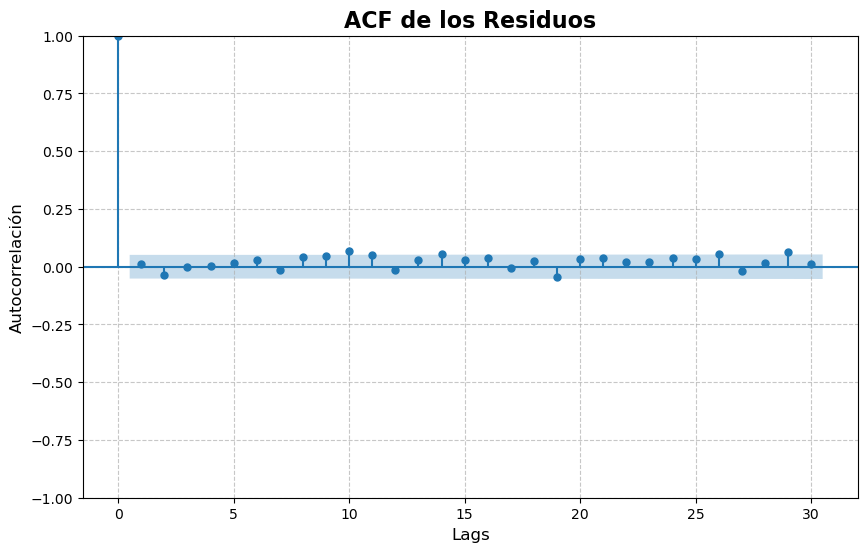

In [68]:
residuals = model_fit.resid

fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(residuals, ax=ax, lags=30)
ax.set_title('ACF de los Residuos', fontsize=16, fontweight='bold')
ax.set_xlabel('Lags', fontsize=12)
ax.set_ylabel('Autocorrelación', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Interpretación del Gráfico ACF de los Residuos

Para evaluar la calidad de ajuste del modelo y analizar la independencia de los residuos, se gráfico la Función de Autocorrelación (ACF) de los residuos obtenidos tras ajustar el modelo ARIMA(1,0,0). Aquí se presentan las interpretaciones:


1. **Comportamiento de los Residuos:** La mayoría de los valores de autocorrelación de los residuos están cerca de cero, lo cual indica que no hay correlación lineal significativa en los residuos para la mayoría de los retardos. Esto es un buen indicador, ya que sugiere que el modelo ha capturado la estructura temporal de la serie y los residuos actúan como ruido blanco, es decir, carecen de patrones predecibles.

2. **Punto de Corte en el Primer Retardo:** El primer retardo muestra un valor significativo, pero esto es común en series temporales y no indica necesariamente un ajuste insuficiente si los retardos posteriores permanecen dentro del intervalo de confianza.

3. **Conclusión Preliminar:** Dado que no se observan correlaciones significativas en los residuos (exceptuando el primer retardo), podemos concluir que el modelo está correctamente especificado, capturando los patrones principales de la serie temporal.